# Exp7

## wanderer1_1agent
- 1 agent and 1 goal landmark
- the agent gets more reward, as it gets close to the goal.
- but the agent is blind at start so that it doesn't have a clue to the goal.
- the agent actions are
    - to move (up, down, left, right, neutral) and 
    - to say "A" or "B"
- when the agent says "A", it uses the energy;
    - it allows the agent to see its surrounding area.
    - the visible area gets wider, as the spent energy is larger.
    - but when the agent spends the energy, it gets negative reward.
    - when it says "B", nothing happens.
- **in summary, there is a trade-off between the visible range and the reward.**

### In the following, I made experiments with different parameter set.
A parameter of "PENALTY_WEIGHT" controls heaviness of the penalty.
#### Summary
the hevieness of the penalty changes the agent's behavior, which is expected.

### wanderer1_1agent-1
no penalty for using the energy (PENALTY_WEIGHT = 0)
#### results
- the agent uses the energy with no limit, which is expected.
    - the reward of -50 means using the energy at every step.

### wanderer1_1agent-2
small penalty (PENALTY_WEIGHT = 0.01)
#### results
- the agent uses the energy with no limit. (penalty < rewards)

### wanderer1_1agent-3
modest penalty (PENALTY_WEIGHT = 0.02)
#### results
- after reaching the goal, the agent saves the energy.
    - this is understandable that the penaly is larger than that of 1agent-2.

### wanderer1_1agent-4
large penalty (PENALTY_WEIGHT = 0.1)
#### results
- the agent doesn't use the energy at all. (penalty > rewards)
    - the penaly is too large for the agent to user the energy.

In [11]:
%matplotlib inline
import glob
import utils_note
plt.rcParams["font.size"] = 12


def get_all_exp_curves(pdir):
    curve_dirs = [osp.join(d, 'learning_curves') for d in glob.glob(pdir+'/*')]
    return curve_dirs

def plot_curves(ax, curve_dir, y_colns_template=None):
    each_exp_dir = curve_dir.split('/')[-2]
    df_r =  pd.read_csv(osp.join(curve_dir, 'agents_rewards.csv'))
    df_m = pd.read_csv(osp.join(curve_dir, 'agents_energy.csv'))
    _df = pd.merge(df_r, df_m, on=['episode', 'step']).drop(['step'], axis=1)
    if y_colns_template is not None:
        y_colns =  [coln for coln in _df.columns 
                             if '_'.join(coln.split('_')[1:]) in y_colns_template]
        kwargs = {}
        linestyles = ['-', '--', '-.', ':']
        for i, y_coln in enumerate(y_colns):
                kwargs['linestyle'] = linestyles[i % len(linestyles)]
                _df.plot(x='episode', y=y_coln, ax=ax, title=each_exp_dir, **kwargs)
                kwargs['color'] = ax.get_lines()[-1].get_color()
    else:
        _df.plot(x='episode', ax=ax, title=each_exp_dir, **kwargs)
    ax.set_ylim([-200, 10])

def plot_training(each_exp_dir, y_columns):
    curve_dir = osp.join(each_exp_dir, 'learning_curves')
    fig, ax = plt.subplots(1, 1, figsize=(5, 3.5))
    plot_curves(ax, curve_dir, y_columns)
    
def plot_energy(fn_video):
    fn_csvs =\
        glob.glob(fn_video.replace('.mp4', '_energy_agent*.csv'))
    dfs = []
    for fn_csv in fn_csvs:
        dfs.append(pd.read_csv(fn_csv))

    fig, ax = plt.subplots(1, 1, figsize=(24, 4))
    legends = []
    for i, df_agent in enumerate(dfs):
        df_agent.plot(y='energy0', ax=ax)
        legends.append('agent%d energy' % i)
    ax.legend(legends)

    # plot end-episode line
    df_ = dfs[0]
    end_epi = 0
    for epi in sorted(df_['episode'].unique()):
        end_epi +=  df_.loc[df_['episode'] == epi, 'step'].max() + 1
        ax.axvline(end_epi, color='orange', ls='--')

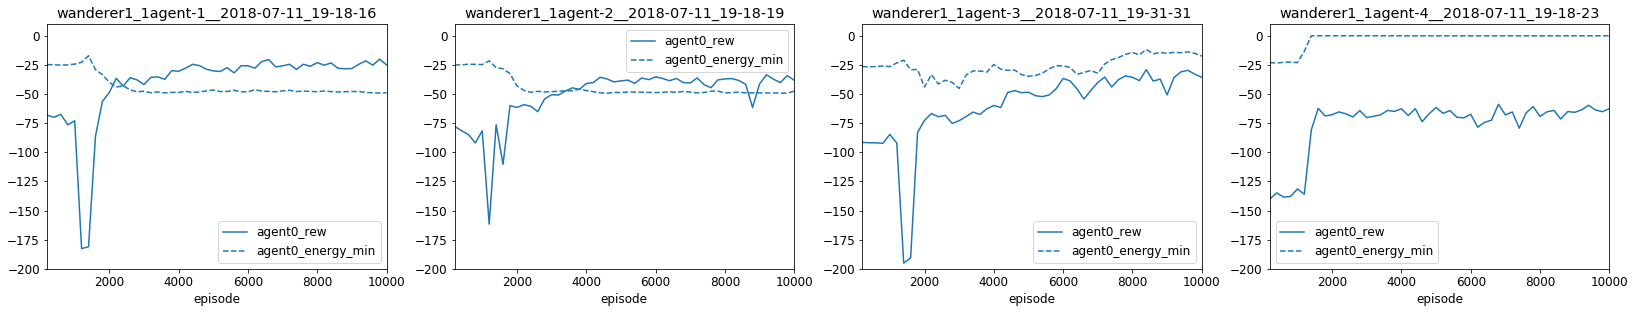

In [5]:
exp_dir = '../exp_results/exp7_180711'
y_columns = ['rew', 'energy_min']
fig, axes = plt.subplots(1, 4, figsize=(28, 4.5))

curve_dirs = get_all_exp_curves(exp_dir)
for i, curve_dir in enumerate(curve_dirs):
    ax = axes[i]
    plot_curves(ax, curve_dir, y_columns)

In [20]:
exp_dir = '../exp_results/exp7_180711'
y_columns = ['rew', 'energy_min']

def show_results(each_exp_dir, epis):
    # training plot
    each_exp_dir = osp.join(exp_dir, each_exp_dir)
    plot_training(each_exp_dir, y_columns)
    plt.show()

    fn_video_template = 'video-{}.mp4'
    for epi in epis:
        fn_video = fn_video_template.format(epi)
        display(utils_note.play_linked_video(each_exp_dir, fn_video))
        video_path = osp.join(each_exp_dir, 'videos', fn_video)
        plot_energy(video_path)
        plt.show()
    print('~o**' * 20)

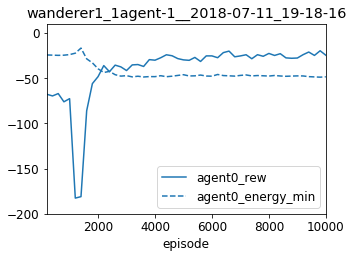

./videos/wanderer1_1agent-1__2018-07-11_19-18-16/videos/video-10000.mp4


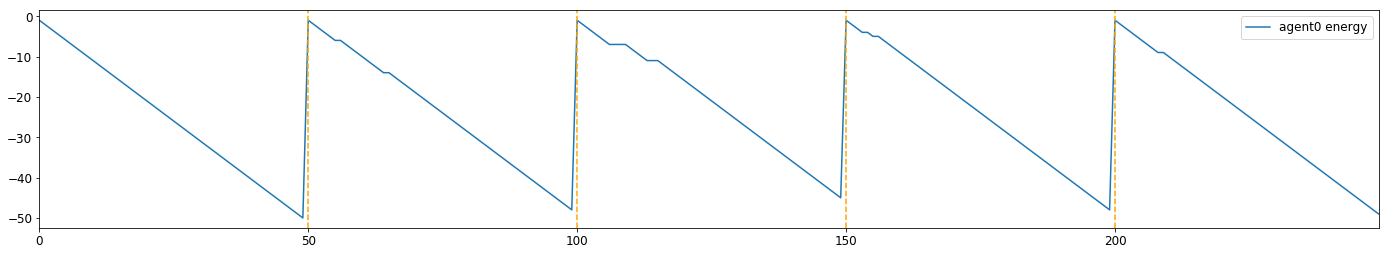

~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**


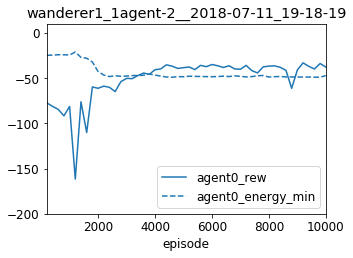

./videos/wanderer1_1agent-2__2018-07-11_19-18-19/videos/video-10000.mp4


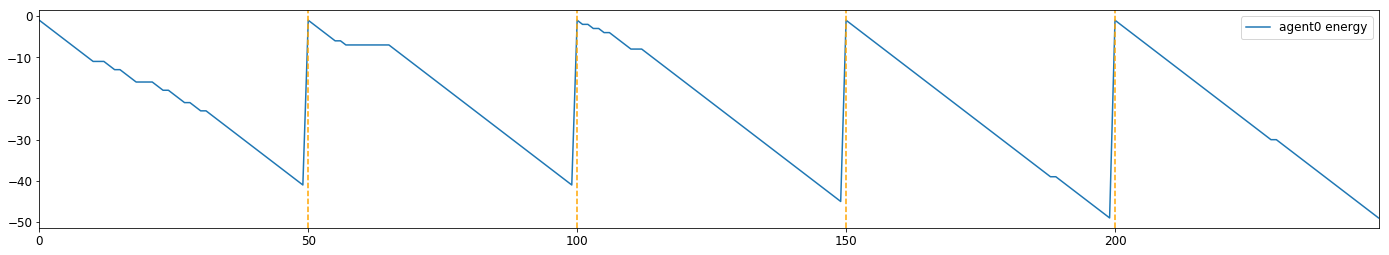

~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**


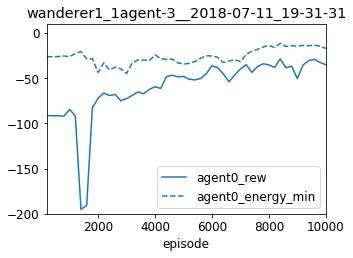

./videos/wanderer1_1agent-3__2018-07-11_19-31-31/videos/video-10000.mp4


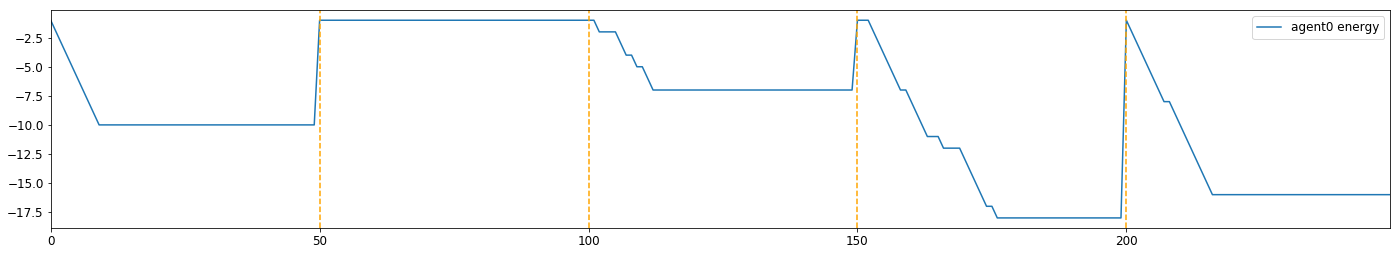

~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**


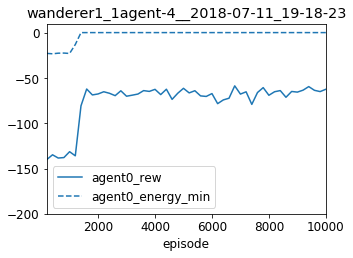

./videos/wanderer1_1agent-4__2018-07-11_19-18-23/videos/video-10000.mp4


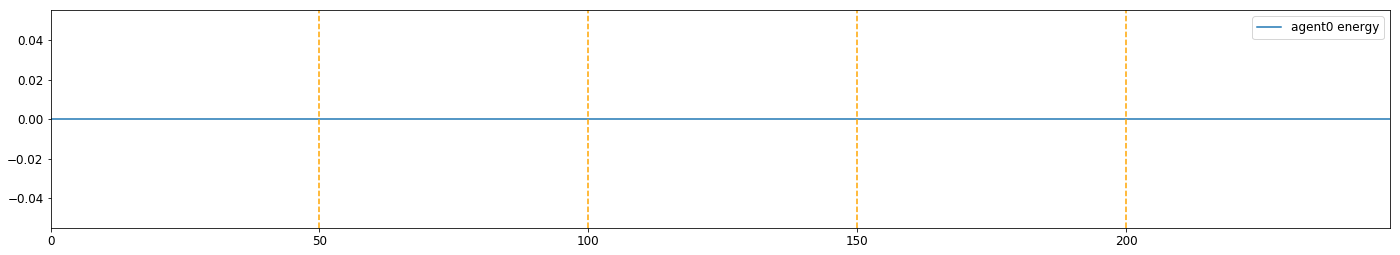

~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**~o**


In [22]:
# each_exp_dir= 'wanderer1_1agent-1__2018-07-11_19-18-16'
each_dirs = [osp.basename(d) for d in glob.glob(exp_dir+'/*')]
epis = [10000]

for each_exp_dir in each_dirs:
    show_results(each_exp_dir, epis)